# does 60% of mrbeast videos have more than 500,000 likes?

I'm measuring likes from mrbeast videos

I am sampling mrbeast videos

I will collect 10 per group and a sample size of 100 so 1000 will be collected total

I will use two-sided proportion z-test

H₀ = the proportion is 0.6

Hₐ = the proportion is not 0.6

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import requests
import json
import matplotlib.pyplot as plt
import time
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
df = pd.read_csv("videos-stats.csv")

mrbeast = df[df["Keyword"].str.contains("mrbeast", case=False, na=False)]

sample_size = 100
videos_per_batch = 10
threshold = 500000

proportions = []

for i in range(sample_size):
    print(i, "----------")
    above_threshold = 0
    collected = 0
    items = mrbeast.sample(videos_per_batch, replace=True).to_dict(orient="records")
    a = 0
    for item in items:
        a += 1
        print(a)
        like_str = item.get("Likes")
        if not like_str:
            continue
        try:
            likes = int(like_str)
        except:
            continue
        print(likes)
        if likes > threshold:
            above_threshold += 1
        collected += 1
        if collected >= videos_per_batch:
            break
    if collected > 0:
        prop = above_threshold / collected
        proportions.append(prop)


0 ----------
1
142261
2
2523764
3
1511358
4
2897163
5
446014
6
2129926
7
1552125
8
1552125
9
31521
10
3550678
1 ----------
1
2135851
2
2129926
3
207061
4
3136265
5
374130
6
3136265
7
381271
8
2021442
9
3206546
10
598389
2 ----------
1
372266
2
2523764
3
385059
4
319041
5
2523764
6
2869906
7
2523764
8
3557658
9
6055504
10
4437532
3 ----------
1
3963124
2
1552125
3
4120158
4
31521
5
378105
6
372266
7
2121115
8
3945358
9
374130
10
1511358
4 ----------
1
4763784
2
2030057
3
3206546
4
598389
5
201509
6
494889
7
367987
8
14259033
9
201509
10
3206546
5 ----------
1
381271
2
6055504
3
2897163
4
3963124
5
598389
6
492024
7
1511358
8
6055504
9
3206546
10
302909
6 ----------
1
557743
2
598389
3
31521
4
4437532
5
3963124
6
3963124
7
207061
8
31521
9
1572751
10
302909
7 ----------
1
3514143
2
557743
3
3514143
4
3514143
5
3206546
6
3963124
7
4120158
8
142261
9
2897163
10
2135851
8 ----------
1
61448
2
2129926
3
557743
4
207061
5
3206546
6
557743
7
2869906
8
365592
9
319041
10
494889
9 ----------
1
2

In [37]:
claimed_prop = 0.6
n = sample_size * videos_per_batch

total_above_threshold = sum(
    int(p * videos_per_batch) for p in proportions
)

print("Total videos sampled:", n)
print("Videos > 500,000 likes:", total_above_threshold)
print("Estimated proportion:", total_above_threshold / n)
print("Pair proportions:", proportions)

Total videos sampled: 1000
Videos > 500,000 likes: 664
Estimated proportion: 0.664
Pair proportions: [0.7, 0.7, 0.7, 0.6, 0.6, 0.7, 0.6, 0.9, 0.5, 0.8, 0.6, 0.4, 0.8, 0.4, 0.5, 0.9, 0.7, 0.6, 0.7, 0.5, 0.8, 0.9, 0.6, 0.8, 0.8, 0.7, 0.6, 0.7, 0.5, 0.3, 0.6, 0.6, 0.7, 0.6, 0.4, 0.8, 0.4, 0.7, 0.8, 0.7, 0.5, 0.6, 0.6, 0.4, 0.7, 0.8, 0.8, 1.0, 0.8, 0.4, 0.6, 0.9, 0.8, 0.6, 0.6, 0.9, 0.4, 0.6, 0.6, 0.6, 0.7, 0.9, 0.8, 0.9, 0.5, 0.8, 0.5, 0.9, 0.9, 0.5, 0.6, 0.5, 0.9, 0.7, 0.2, 0.9, 0.5, 0.4, 0.8, 0.9, 0.6, 0.3, 0.5, 0.5, 0.7, 0.9, 0.5, 0.5, 0.5, 0.9, 0.8, 0.6, 0.8, 0.7, 0.6, 0.8, 0.8, 0.9, 0.9, 0.7]


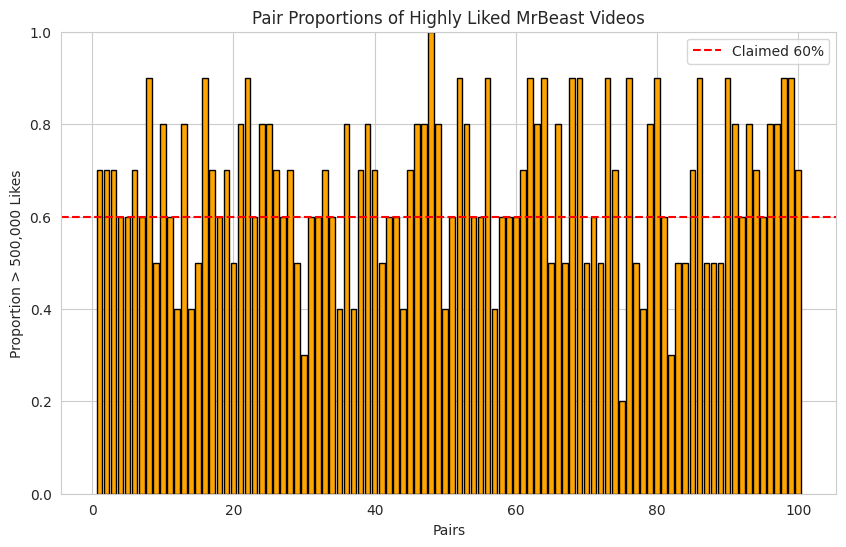

In [36]:
likes_list = [int(item.get("Likes")) for item in mrbeast.sample(sample_size * videos_per_batch, replace=True).to_dict(orient="records")]

plt.bar(range(1, sample_size+1), proportions, color='orange', edgecolor='black')
plt.axhline(0.6, color='red', linestyle='dashed', label='Claimed 60%')
plt.xlabel("Pairs")
plt.ylabel("Proportion > 500,000 Likes")
plt.title("Pair Proportions of Highly Liked MrBeast Videos")
plt.ylim(0, 1)
plt.legend()
plt.show()

yes I regect the H₀ because my simulation shows that the estimated proportion of MrBeast bideos with moer than 500,000 likes is 0.7, wich is higher than my claimed proportion of 0.6.

This means that a large majority of MrBeast’s videos get more than 500,000 likes. For YouTube creators, it shows that if they made videos similar to MrBeast's videos they might be able to gain some likes too.

Some limitations are that some videos might have been counted multiple times and the CSV dataset may be incomplete or have errors in the like counts. this also isn't all of the MrBeast videos either so it could be less accurate.

next, I could compare MrBeast videos to other creators and comapre their likes